# Navie Bayesian

Last updated 202111_20201122_20190826MON1700

## 목적

## 목차
* 5.2 문제
* 5.3 확률에 대한 관점
* 5.4 베이지안 확률
    * 5.4.1 판단 오류
    * 5.4.2 베이지안 추론
    * 5.4.3 사전확률
    * 5.4.4 가능도
* 5.5 Navie Bayesian algorithm
* 문제 1: 일반적인 확률
* 문제 2: 조건부 확률
* 문제 3: 베이지안
* 문제 4: Naive Bayesian 추론
* 5.6 이항 베이지안
* 문제: Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델
* 5.7 정규분포 베이지안
* 5.8 다항 베이지안 multinomial Bayesian
* 문제: 트윗 정서 분석

* toDO: house-votes-84.data

## 5.2 문제

스팸인지 아닌지, 긍정인지 부정인지, 불량인지 아닌지와 같은 **분류** 문제가 있다고 하자.
Logistic Regression, 의사결정트리와 같은 지도기계학습과 더불어 Naive Bayesian도 분류에 적용할 수 있다.
NB는 베이즈 정리 Bayes' theorem에 따라 확률계산을 하지만, 변인 간에 **독립적, 즉 naive한 관계**를 가정하고 적용된다.

확률을 계산해서 분류의 문제를 푸는 경우에 유의할 점이 있다.
* 속성의 값이 **비연속적**, 예를 들어 단어의 발생빈도에 따라 정서를 분류하거나, 또는 **연속적**인 값을 가지는 몸무게, 키, 발크기에 따라 성별을 구분하는 경우,
* 분류하고자 하는 대상이 **이진적 binary** 또는 **다항적 multiclass**인지에 따라,
* 또는 **사전확률**을 알 수 있는지, 알 수 있다면 어떤 분포를 따르는지 분별해야 한다.

## 5.3 확률에 대한 관점

확률에 대한 관점은 빈도주의자와 베이지안으로 구분하여 볼 수 있다.
**빈도주의자 frequentists**는 확률이란 오랫 동안 반복하면 기대하는 빈도, 즉 P(A) = n/N, n은 N회 반복했을 경우 A의 기대 값이라고 주장한다 (objective, physical). 주사위를 던지는 경우, 발생할 수 있는 경우의 수는 1, 2, 3, 4, 5, 6이고, 주사위가 공평하게 만들어져 있기 때문에 객관적으로 발생할 수 있는 빈도는 1/6로 확률이 정해진다. 무작위로, 충분히 샘플링을 하여 발생한 과거의 데이터로 계산한다. 1회 던지는 경우, 1/6이라는 정확한 확률이 나오지 않을 수 있다. 사전 지식은 무의미하게 된다. 빈도주의자는 가설을 설정하고, 실험을 하고, 결과를 통해 가설이 맞는지 통계적 추정을 할 경우, 그 값이 정해져 있다고 본다. 예를 들어, 모집단이 정규분포를 따른다고 하면, 평균은 어떤 확률로 신뢰구간 내에 반드시 그 값이 존재한다.

**베이지안 Bayesian**은 확률이란 불확실한 사건에 대한 주관이나 자신이 믿고 있는 정도에 따라 확률이 정해진다고 생각한다 (epistemic, evidential, subjective, degree of belief). 
주사위를 던지는 경우에도 현재의 주관적 믿음에 따라 확률을 정하고, 정보가 추가적으로 주어지면, 그에 따라 갱신된다. 따라서 정보가 부족하므로 1) 사전확률prior을 정하고, 2) 주어지는 증거에 따라 갱신likelihood, 3) 사후확률posterior 추정한다. 평균 값을 추정을 할 경우, 그 값은 불확실하며 분포에 따라 신뢰구간 내에 존재할 수도 있고 없을 수도 있다.

## 5.4 베이지안 확률

### 5.4.1 판단 오류

베이지안으로 생각하면 판단의 오류가 왜 비롯되는지 알 수 있다.
어떤 사람이 무죄임에도 불구하고, 검사는 **증거가 발견되었으니 당신은 유죄**라고 한다면 얼마나 억울하겠는가?

| 유죄  | 무죄 | 합계
-----|-----|-----
증거 | 1 | 10 | 11
증거 x | 0 | 9,999,990 | 9,999,990
합계 | 1 | 10,000,000 | 10,000,001

(출처: 위키피디아)

필요한 것은 p(유죄|증거), 증거가 발견되었을 경우, 그 사람이 유죄인지 무죄인지를 따져야 한다.
그러나 **P(증거|무죄), 즉 무죄이지만 증거가 발견될 백만분의 1**, 표에서 보듯이, **확률이 매우 적기 때문에 유죄**라는 판단을 하는 것이다.

즉 P(유죄|증거)를 올바르게 판단하려면, P(증거|유죄)에 P(유죄)를 곱해서 P(증거)로 나눈 값을 계산해야 한다.
* P(유죄) = $\frac{1}{10,000,001}$ 그 사람이 유죄일 **사전확률**. 그 사람이 유죄라는 확률은 미리 알기 어렵다.
* P(증거|유죄) = $\frac{1}{1}$, 그 사람이 유죄라면 증거가 일치하는 확률
* P(증거) = $\frac{11}{10,000,001}$ 유무죄 상관없이 증거가 발견되고 일치할 확률

간과하기 쉬운 것은, 무죄라고 추정되지만 증거가 발견될 확률이 적지만, 10/10,000,000건이 존재한다는 사실이다. 예를 들어, 지문이 흉기에서 발견되었지만, 사건 이전에 용의자가 만지거나, 사건에 개입되면서 닿았거나, 또는 사건 후에 만져서 생겼을 수 도 있다. 또는 용의자가 거의 확실한 알리바이를 가지고 있다면 유죄일 확률은 지문이 발견될 확률보다 매우 적게 된다.

잘못된 판단은 **p(증거|유죄) = p(유죄|증거)**라고 믿는 것이다.
즉, "유죄이므로 증거가 나왔다"를 "증거가 나왔으니 유죄다"라고 판단, 예를 들어, 지문이 나왔다고 해서, 그 사람을 범인으로 단정해서는 안되는 것이다. **증거가 나왔다고 하더라도 유죄가 아니라 무죄일 확률**이 있는 것이다. 매우 확실한 알리바이를 가지고 있다면, 지문이 나오든 나오지 않든 범인이 아닐 가능성이 높은 것이다. 베이지안은 이런 판단이 잘 못되었다는 것을 알려주고 있다.

이런 판단은 일상생활에서도 많다.
'몇 일 동안이나 답전화를 하지 않다니, 나를 더 이상 사랑하지 않나봐',
'어떻게 나에게 그런 말을 할 수 있어, 아주 나쁜 사람이야'라는 판단도 역시 오류일 수 있다.

어떤 증거에 따라 그 사람을 판단하는, 즉 P(그 사람이 나를 더 이상 사랑하지 않아|몇 일 동안 답전화가 없다)라는 $P(\theta|D)$를 확신하는 것은 $P(D|\theta)$를 충분히 고려하지 못하는 오류를 포함할 수 있다는 점이다.
그 사람이 다른 이유로 답전화를 못하거나, 학교에서 성적이 F를 받고 화를 내거나 할 수 있는 확률이 있다.

### 5.4.2 베이지안 추론

베이지안에서는 어떤 가설을 평가하기 위해, 먼저 (1) 사전확률 $P(\theta)$을 예상하고, 여기에 관측된 데이터로부터 계산된 (2) 가능성 likelihood $P(D|\theta)$을 곱하고, (3) P(D)로 나누어, 사후확률을 계산하여 추론하게 된다. 

$P(\theta|D) = \frac{P(D|\theta) P(\theta)}{P(D)}$

P(D)는 사후확률을 확률분포로 만들게 하는 정규화 상수이다. 즉 P(D)로 나누어주면 사후확률분포의 합이 1이 되게 한다.
추론을 할 때는 최대값을 구하기만 하면 되므로, 위 식에서 분모 P(D)를 생략하면 아래와 같다. 좌측 사후확률이 우측 계산식과 동일하지 않기 때문에, 비례관계에 있다고 (propotional to) 한다.

$P(\theta|D) \propto P(D|\theta) \cdot P(\theta)$

즉 사후확률은 ∝ 가능도 × 사전확률로 계산할 수 있다.

또는, 로그를 취해서, $log P(D | \theta) + log P(\theta)$을 사용해서 추론할 수 있다.

### 5.4.3 사전확률

베이지안에서의 사전확률은 어떤 사건이 얼마나 발생할 것인지
아무런 증거도 없는 상황에서의 **개인적인 믿음의 정도**를 말한다.
예를 들어, 야구에서 타자가 안타를 칠 것인지 아닌지 100회 출장에서 25회의 안타를 기록했다고 하면 P(안타)=0.25이고 아닌 경우는 0.75가 된다.

사전확률을 **모르는 경우, 균등분포 uniform distribution**을 따른다고 가정하고, 모든 사건이 동일한 확률로 발생한다고 예상할 수 있다. 또는 사전확률 $P(\theta)$의 분포가 사후확률 $p(\theta|D)$의 분포와 같은 유형이라고 가정할 수도 있다. 실제 계산해 보면, 사후확률은 사전확률에 likelihood를 갱신하기 때문에 매우 유사한 분포를 가진다.
이 경우 사전, 사후 확률의 분포를 컬레분포, conjugate distributions라고 하고, **가능도를 갱신할 때 쓰이는 사전확률을 '켤레 사전확률, conjugate prior'**이라고 한다.
예를 들어, 가능도가 정규분포를 따르고 이 경우 **사전확률을 정규분포로 하면 사후확률도 컬레로 정규분포**를 따르게 된다. likelihood가 특정 분포를 따른다고 가정할 경우, 사전확률과 사후확률은 동일한 분포를 따르게 된다 (Raiffa & Schlaifer, 1961). 이 가정에 따르면, **사후확률을 계산할 때, 분모계산을 하지 않게 하지 않아도** 된다. 예를 들어, 동전던지기는 **이항분포를 가진 사후확률의 사전확률도 이항분포**라고 할 경우, **베타분포를 conjugate prior로 사용**한다. 

* likelihood가 정규분포를 따르면 Gaussian, 컬레확률은 Gaussian
* 다항분포일 경우, 컬레확률은 Dirichlet (예: 토픽모델링 lda)
* 포아손분포일 경우, gamma

### 5.4.4 가능도

가능도 likelihood를 계산할 경우, 속성 간의 관계성을 무시하고 계산한다. **독립적**이란 사건의 발생이 서로 영향이 주고 받지 않는다는 의미이다. 동전을 2개 던지면 앞면이 나올지 뒷면이 나올지 서로 독립적이다.
예를 들어, 어떤 단어들이 발생한 경우 어느 클래스에 속하는지 계산한다고 하자. 단어간의 관계가 서로 독립적이라고 가정하고 **각 단어의 발생확률만을 서로 곱**하여 확률을 계산한다. 그러면 아래 첫번 째 식은 두번째 식으로 변환될 수 있다.

$
\begin{align}
P(C_k \vert x_1, \dots, x_n)
    & \varpropto P(C_k, x_1, \dots, x_n) \\
    & \varpropto P(C_k) P(x_1 \vert C_k) \
         P(x_2\vert C_k) P(x_3\vert C_k) \cdots \\
    & \varpropto P(C_k) \prod_{i=1}^n P(x_i \vert C_k)
\end{align}
$

이런 가정을 하는 이유는 계산의 복잡성을 줄이기 위한 가정이다. 예를 들어, 속성이 2가지 값을 갖고, 이러한 속성이 5개 있다면 $2^5=512$ 경우의 확률을 계산해야 하지만, NB의 경우, $2 \times 5 = 10$개를 계산하면 된다.

계산하면서, 식에서 발생한 건수가 없어서 확률 계산을 하면서 0이 되는 문제가 있다.
0값으로 나누어지는 것을 막기 위해 임의로 적은 수를 더하여 주는 Laplace smooting을 적용하게 된다.

$ P(x)=\frac{count(x) + \alpha}{N + \alpha \vert x \vert}$

* count(x) x의 발생건수
* |x|는 발생가능한 사건의 수
* $\alpha$는 조절변수. 0이면 조절이 없게 되고, 1이면 add-one smoothing
* N은 x의 총발생건수

예를 들어, 메시지는 스팸이거나 아니 경우 2가지가 있다고 하자.

$ P(메시지가 스팸) = \frac {스팸메시지갯수 + k} {전체메시지갯수 + k \times 메시지분류갯수}$

전체3개 가운데 3개 모두 스팸인 경우, 그리고 2가지로 분류하므로 k=2

$ \frac{3 + 2 }{3 + 2 \times 2}= \frac {5}{7}$

## 5.5 Navie Bayesian algorithm

* input: 문서와 문서별로 할당된 클래스 (D, c)
* output: 문서의 분류 클래스
* for c $\in$ C 모든 클래스에 대해 ($\in$은 "belongs to" 혹은 "is in the set of", 즉 C에 속하는 모든 c)
    * $ \frac{N_c} {N}$ 클래스가 발생할 사전확률을 구한다 ($N_c$ 클래스 발생갯수, N: 전체갯수)
    * 가능도 likelihood를 계산한다.
    * 사후확률을 계산한다.
        $P(\theta | D) = P(D)$
    * 갱신된 확률에 따라 추론 Bayesian Inference 한다.
        * ML (Maximum likelihood estimation)
            * $c_{ML}=argmax_c P(D | \theta)$, 우도가 최대인 가설, c가 맞다고 추론
        * MAP (Maximum a posteriori estimation)
            * $c_{MAP}=argmax_c P(\theta | D)$, 우도가 아니라, 사후확률이 최대인 가설이 맞다고 추론            

## 문제 1: 일반적인 확률

7개의 공이 있다. 이 가운데 하얀 공 3 (W W W), 검은 공 4개 (B B B B)라고 하자.
* p(W) = 3/7
* p(B) = 4/7

## 문제 2: 조건부 확률

가방이 B1, B2가 있다고 하자. 흰공W과 검은공B이 가방에 나누어져서 들어있다고 하자.
* B1에는 흰공W 2개 검은공B 2개,
* B2에는 흰공W 1개 검은공B 2개가 들어있다고 하자.

|    | 흰공 W | 검은공 B |
|----|---|---|
| 가방 B1 | 2 | 2 |
| 가방 B2 | 1 | 2 |

흰공W 이고, B2에서 나왔을 확률 $P(A=B2|B=W)$을 계산해보자.

조건부확률은 계산하면:

$
\begin{align}
P(A \vert B) &= \frac{P(A \cap B)}{P(B)} \\
    & = \frac{P(A) \times P(B)}{P(B)}
\end{align}
$

* $P(A=B2|B=W) =\frac{P(B2\ and\ W)}{P(W)} = \frac{1/7}{3/7}=1/3$

### 문제 3: 베이지안

위의 조건부확률을 베이지안으로 풀어보자.

* 위에서 흰공W이 뽑힌 경우, B2에서 나왔을 확률 $P(A=B2|B=W) = \frac{P(B2\ and\ W)}{P(W)}$
* 주머니B2를 선택해서 공을 하나 뽑을 경우 흰 공일 확률로 바꾸어 쓰면:
    * $P(B=W|A=B2) = \frac{P(W\ and\ B2)}{P(B2)} = P(W|B2) \times P(B2)$
* 위 식에 대입하면:
    * $P(A=B2|B=W) = \frac{P(W|B2) P(B2)}{P(W)}$

이 베이지안 식에 따라 흰공이 나왔는데, 가방2에서 나왔을 확률을 계산하면:
* $P(A=B2|B=W)=\frac{P(W|B2) P(B2)}{P(W)} = \frac{(1/3)(3/7)}{(3/7)}=1/3$

또 다른 예를 풀어보자. 다음과 같은 경우의 수가 있다고 하자.

|     | 강우 | 맑음 |
|-----|-----|-----|
| 승리 |  3  |  2  |
| 패배 |  1  |  6  |


* 오늘 비가 오고 있는데, 이 경우 승리할 확률을 구하면,
* $P(A=승리|B=비) = \frac{P(B|A) P(A)}{P(B)} = \frac{(3/5) (5/12)}{(4/12)} = 3/4 =0.75$
* 즉, 사전확률prior probability 5/12, 가능도likelihood 3/5

## 문제 4: Naive Bayesian 추론

A=m, B=q이면, C가 1인지 0인지 추론해보자.
* C가 1인 확률: 
    * $Pr(C=1) \times \prod_{j=1}^2\ Pr(A_j=a_j|C=1)$
    * Pr(C=1) x ( Pr(A=m | C=1) x Pr(B=q | C=1) ) = 1/2 x 2/5 x 2/5 = 2/25

* C가 0인 확률:
    * $Pr(C=0) \times \prod_{j=1}^2\ Pr(A_j=a_j|C=0)$
    * Pr(C=0) x ( Pr(A=m | C=0) x Pr(B=q | C=0) ) = 1/2 x 1/5 x 2/5 = 1/25

* argmax(2/25,1/25)를 구하면 첫 번째, 즉 C=1로 추론하게 된다.

### 데이터

numpy 구조배열 structured array 또는 record array는 C언어의 'struct'과 비슷한 구조화된 배열
이런 구조는 Pandas를 사용하기도 한다.

데이터는 **튜플리스트**로 만들어 준다.
컬럼명과 데이터타입의 메타데이터를 설정해서 데이터를 읽을 수 있다.
* 속성은 'A', 'B', 'C'로 명명한다.
* 데이터형 dtype의 'U'는 유니코드 문자열, 뒤 숫자는 자릿수를 의미한다.
i는 정수, 뒤 숫자는 8비트, 'i1'은 8비트 정수를 의미한다.
'a1'은 문자열 1자리로 정의한다.

```python
np.array([('m', 'b', 1), ... ('m', 'b', 0)], dtype=[('A','a1'),('B','a1'),('C','a1')])
```

In [1]:
import numpy as np
_x = np.array([
        ('m', 'b', 1),
        ('m', 's', 1),
        ('g', 'q', 1),
        ('h', 's', 1),
        ('g', 'q', 1),
        ('g', 'q', 0),
        ('g', 's', 0),
        ('h', 'b', 0),
        ('h', 'q', 0),
        ('m', 'b', 0)],
        dtype=[('A', 'U1'), ('B', 'U1'), ('C', 'i1')
])

### 조건에 따른 조회

numpy의 구조배열은 속성명(메타데이터)으로 데이터를 읽을 수 있다.

numpy 구조배열이므로, **컬럼명 인덱스로 선택**하여 읽을 수 있다.

In [2]:
_x['A']

array(['m', 'm', 'g', 'h', 'g', 'g', 'g', 'h', 'h', 'm'], dtype='<U1')

앞은 컬럼명, 뒤 [1:5]는 시작 2번째 ~ 끝 5번째까지 행을 선택하여 읽을 수 있다.

In [3]:
_x['B'][1:5]

array(['s', 'q', 's', 'q'], dtype='<U1')

조건에 맞는 **모든 행**을 읽을 수 있다.
```_x['A'=='m']```이라고 하면 안된다.

In [4]:
_x[_x['A']=='m']

array([('m', 'b', 1), ('m', 's', 1), ('m', 'b', 0)],
      dtype=[('A', '<U1'), ('B', '<U1'), ('C', 'i1')])

**특정 컬럼**에 대해 조건에 맞는 경우만을 읽을 수 있다.

In [6]:
_x['A'][_x['C']==1]

array(['m', 'm', 'g', 'h', 'g'], dtype='<U1')

np.count_nonzero() 함수를 사용해서 조건에 맞는 개수를 계산할 수 있다.
C가 1인 경우의 A컬럼에 대해 m의 개수를 세면 2가 된다.

In [5]:
np.count_nonzero(_x['A'][_x['C']==1] == 'm')

2

### 1) 사후확률 post_c1 (c=1)

A=m이고 B=q일 경우, Pr(C=1)를 구해보자

확률은 딕셔너리 구조를 활용해서 풀어보자.
딕셔너리는 키와 값을 저장하는 구조이다.
확률은 전체 개수에서 고유키가 몇 개 발생했는지 계산하기로 하자.

c가 1일 경우, A=m이고 B=q일 확률은 0.08이다. 5/10 x 2/5 x 2/5 = 2/25.

#### 1-1) 사전확률 Pr(c=1)

프로그램으로 확률을 계산하려면 조금 복잡하다.
어떤 키 key가 있는지 찾아야 하고, 그 키가 전체에 몇 개 있는지 계산해야 한다.
세째 컬럼을 보자. 
전체 10개 사례 가운데 '1'은 5개이다.
확률은 $\frac{5}{10}=0.5$가 된다.

먼저 키를 세어보자.
모든 사례에 대하여 키와 빈도를 세어 ```defaultdict(int)```로 사전확률을 저장한다.
처음에는 딕셔너리가 **아무 것도 없이 깨끗하게 비어있게 되고, 여기에 키를 추가하려면, defaultdict으로 선언**하고 사용해야 한다.
```int```로 선언한 이유는, 빈도가 정수이므로 그렇다.

In [7]:
import collections

prior_kc=collections.defaultdict(int)
for item in _x['C']:
    prior_kc[item]+=1 # ok to add (key, value) to defaultdict. NOT ok if not defaultdict

In [8]:
print ('prior key counts computed: {}'.format(prior_kc))

prior key counts computed: defaultdict(<class 'int'>, {1: 5, 0: 5})


```defaultdict(int)```에 저장된 키, 빈도로 부터 확률을 계산한다.

In [9]:
allFreq=sum(prior_kc.values())
prior_c=dict()
for k,v in prior_kc.items():
    prior_c[k]=float(v)/allFreq
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


#### 1-2) 가능도 Pr(A=m | c=1) -> 2/5

c=1인 경우, A=m인 우도를 계산해보자.
c=1은 5개, 5개 가운데 A=m인 경우가 2회 이므로, 확률은 2/5가 된다. -> 2/5

In [17]:
aLikelihood_c1=_x['A'][_x['C']==1]
kc_a_c1=collections.defaultdict(int)
for item in aLikelihood_c1:
    kc_a_c1[item]+=1
print ('kc_a_c1 key counts computed: {}'.format(kc_a_c1))

kc_a_c1 key counts computed: defaultdict(<class 'int'>, {'m': 2, 'g': 2, 'h': 1})


In [16]:
allFreq=len(aLikelihood_c1)
prob_a_c1=dict()
for k,v in kc_a_c1.items():
    prob_a_c1[k]=float(v)/allFreq
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


#### 1-3) 가능도 Pr(B=q | c=1) -> 2/5

c=1인 경우, B=q인 우도를 계산해보자.
c=1은 5개, 5개 가운데 B=q인 경우가 2회 이므로, 확률은 2/5가 된다.

In [18]:
bLikelihood_c1=_x['B'][_x['C']==1]
kc_b_c1=collections.defaultdict(int)
for item in bLikelihood_c1:
    kc_b_c1[item]+=1
print ('kc_b_c1 key counts computed: {}'.format(kc_b_c1))

kc_b_c1 key counts computed: defaultdict(<class 'int'>, {'b': 1, 's': 2, 'q': 2})


In [19]:
allFreq=len(bLikelihood_c1)
prob_b_c1=dict()
for k,v in kc_b_c1.items():
    prob_b_c1[k]=float(v)/allFreq
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


#### 1-4) 사후확률 post_c1 (c=1) -> 0.08 (2/25 = 5/10 * 2/5 * 2/5)

사후확률은 앞서 계산한 사전확률 및 우도를 곱해서 계산한다. 0.5 * 0.4 * 0.4 = 0.08
* 사전확률 prior_c: {1: 0.5, 0: 0.5}에서 0.5,
* A의 우도 prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}에서 0.4,
* B의 우도 prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}에서 0.4,

In [20]:
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


In [21]:
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


In [22]:
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


위 계산결과를 넣어서 사후확률을 계산해보자.

In [23]:
post_c1=prior_c[1]*prob_a_c1['m']*prob_b_c1['q']
print ("posterior computed if c==1: {:.3f}".format(post_c1))

posterior computed if c==1: 0.080


### 2) 사후확률 post_c0 (c=0)

이번에는 A=m이고 B=q일 경우, Pr(C=0)를 구해보자

앞서 확률은 딕셔너리 구조를 활용해서 풀어보았다. 여기서는 개수만을 세어서 계산해보자.

c가 0일 경우, A=m이고 B=q일 확률은 0.04이다. 5/10 x 1/5 x 2/5 = 1/25.

np.count_nonzero() 함수는 조건에 맞는 요소의 개수를 계산한다. 2차원 배열은 axis=0이면 컬럼별, axis=1 행별로 계산을 한다.

In [24]:
prior_c0 = np.count_nonzero(_x['C']==0)/_x.shape[0]

c=0일 경우 A=m의 개수는 1, c=0인 개수는 5이다. 이를 나누면 0.2이다. 아래식과 같이 계산할 수 있다.

In [25]:
prob_am_c0=np.count_nonzero(_x['A'][_x['C']==0] == 'm')/np.count_nonzero(_x['C']==0)

c=0일 경우 B=q의 개수는 2, c=0인 개수는 5이다. 이를 나누면 0.4이다. 아래식과 같이 계산할 수 있다.

In [26]:
prob_bq_c0=np.count_nonzero(_x['B'][_x['C']==0] == 'q')/np.count_nonzero(_x['C']==0)

In [32]:
post_c0 = prior_c0 * prob_am_c0 * prob_bq_c0
f"post_cf:{post_c0:.3f}"

'post_cf:0.040'

### lambda 함수를 이용해보기

이번에는 lambda함수를 정의해서 간단히 해보자.

**set은 중복이 없이 저장한다는 특성**을 이용해서 키를 구한다.
그리고 **리스트의 특정 요소가 몇 개인지 세는 count()** 함수를 이용해서 **딕셔너리**로 출력한다.
짧은 코드이지만, 간단 명료하게 기능을 다하고 있다.

```python
getProb=lambda x: dict((i,x.count(i)/float(len(x))) for i in set(x))
```

사전 확률은 계산하자.
아래 코드에서 반복문에서 set를 이용해서 키를 추출하고, ```리스트.count(i)/float(len(리스트))```로 개수를 계산한다. set와 리스트의 특징을 잘 활용한 코드이다.

In [27]:
c=_x['C'].tolist()
for i in set(c):
    print("prior_{}: {}".format(i, c.count(i)/float(len(c))))

prior_0: 0.5
prior_1: 0.5


위 코드를 lambda로 변경해서 해보자.

In [28]:
# ref: DecisionTree.getProb()
getProb=lambda x: dict((i,x.count(i)/float(len(x))) for i in set(x))
print ("prior: {}".format(getProb(c)))

prior: {0: 0.5, 1: 0.5}


In [29]:
# Pr(A=m | c=0) -> 1/5
a=_x[_x['C']==0]['A'].tolist()
prob_a_c0=getProb(a)
print ("prob_b_c0: {}".format(prob_a_c0))

prob_b_c0: {'h': 0.4, 'g': 0.4, 'm': 0.2}


In [30]:
# Pr(B=q | c=0) -> 2/5
b=_x[_x['C']==0]['B'].tolist()
prob_b_c0=getProb(b)
print ("prob_b_c0: {}".format(prob_b_c0))

prob_b_c0: {'b': 0.4, 'q': 0.4, 's': 0.2}


### 3) 의사결정

확률이 높은 true로 결정한다.
argmax()는 큰 값의 인덱스를 출력한다.
즉, post_ct = 0.08, post_cf=0.04이므로 첫번째 인덱스인 0이 출력된다.

In [33]:
np.array([post_c1,post_c0]).argmax()

0

## 5.6 이항 베이지안

**이항모델 Binomial Bayesian**은 다항모델의 한 종류이다. 이항분포는 사건이 이진적일 경우에 적용하게 된다. 동전은 앞, 뒤면 가운데 하나가 발생할 수 있다. 앞면의 확률이 p이면, 뒷면 확률은 1-p이다.

발생빈도가 아니라, 발생했는지 안했는지 이진적으로 측정한다. 동전을 1회 던지는 경우를 예로 들 수 있다. 앞 면이면 1, 뒷 면이면 0으로 확률을 계산한다.

베이지안 확률에 따르면:
$p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)}$

$\theta$는 가설로서, 어떤 확률이 된다. D는 증거 또는 데이터를 말한다.

* 사전확률 $p(\theta)$이란 증거 D를 감안하지 않고 사전에 $\theta$에 대한 믿음의 강도을 말한다.
* 사후확률 $p(\theta|D)$ 증거 D를 고려하고 가지게 되는 믿음의 강도. 예를 들어, 동전을 10번 던져서 5회 나왔다는 것을 보고 나서, 확률이 $\theta$라고 믿게 되는 확률을 말한다.
* 가능도 $p(D|\theta)$란 동전이 $\theta$의 확률일 경우, 예를 들어, 10회 던져서 몇 번이나 앞, 뒤면이 나오는지를 말한다.

정규분포와 이항분포의 분포를 displot() 그래프로 그려보자.
binomial()은 n시도에서, p=성공확률로 무작위 수를 생성한다.
normal()은 loc 평균, scale 분산으로 무작위 수를 생성한다.

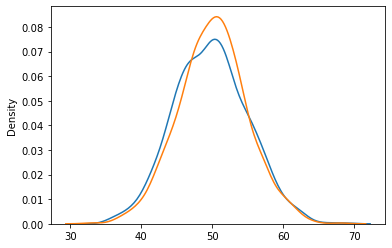

In [34]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(random.normal(loc=50, scale=5, size=1000), label='normal')
sns.kdeplot(random.binomial(100, p=0.5, size=1000), label='binomial')
plt.show()

### 사전확률

사전확률 $p(\theta)$는 베타분포를 따른다고 하자, $\theta \sim Beta(\alpha, \beta)$
베타분포를 따르는 경우, $\alpha$, $\beta$에 따라 모양이 결정된다.
두 값을 1, 1이라고 하고, 100회 무작위 샘플하면 평균값을 사전확률로 사용할 수 있다.

In [44]:
import numpy as np

np.random.beta(1,1,100).mean()

0.4503211042921095

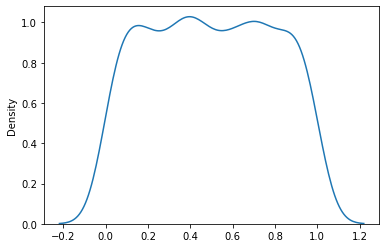

In [46]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='binomial')
plt.show()

### 가능도 

이항분포 PMF Probability Mass Function은 성공(p확률) k회, 실패(1-p확률) n-k회인 경우: 

$$
f(k;n,p) = P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}
$$

choose n for k는 가능한 경우의 수를 의미한다. 순서를 무시해서 계산하면,

p=0.5인 이항분포에서의 확률은 $P(D|\theta) = 0.5^{30} \cdot (1−0.5)^{70}$


In [47]:
# 6회에서 앞 면이 0,1,2,3,4,5,6 나올 확률. 단 동전이 biased되어서 앞면 확률은 0.3.-> 0.5
# 확률을 구해보면:
from scipy import special
n=6
k=0
p=0.5
# comb(6,0)는 exact연산.
print (special.comb(6, k, exact=True)*(p**k)*( (1-p)**(n-k) ) )

0.015625


In [48]:
for i in range(7):
    print ("Pr(X = {} heads)= {:.5f}".format(i, special.comb(6, i, exact=True)*(p**i)*( (1-p)**(n-i) ) ) )

Pr(X = 0 heads)= 0.01562
Pr(X = 1 heads)= 0.09375
Pr(X = 2 heads)= 0.23438
Pr(X = 3 heads)= 0.31250
Pr(X = 4 heads)= 0.23438
Pr(X = 5 heads)= 0.09375
Pr(X = 6 heads)= 0.01562


In [36]:
import scipy.stats as stats
for i in range(7):
    print ("{:.5f}".format(stats.binom.pmf(i,6,0.5)))

0.01563
0.09375
0.23438
0.31250
0.23438
0.09375
0.01563


### 사후 확률

베이지안 사후확률은:
$p(\theta | k,n) = \frac{\displaystyle P(k,n|\theta) P(\theta)}{\displaystyle P(k,n)}$

이식에,
* 사전확률은 베타분포,
* 가능도는 앞서 계산한 $\theta^k(1-\theta)^{n-k}$,
* 그리고 분모는 생략하여 정리하자.

그러면 아래 식으로 계산된다.

$
\begin{align}
P(C_k \vert k,n)
    & \varpropto P(k,n|\theta) P(\theta)\\
    & \varpropto \theta^k(1-\theta)^{n-k}\
        \cdot \theta^{\alpha - 1}(1-\theta)^{\beta -1}\\
    & = \theta^{k+\alpha-1}(1-\theta)^{n-k+\beta-1}\\
    & = Beta(\theta \vert k+\alpha, n-k+\beta)
\end{align}
$


사전확률 $P(\theta)$이 베타분포를 따르면 $\theta \sim Beta(\alpha, \beta)$,
사후확률도 베타분포를 따르게 된다 $\theta \sim Beta(k+\alpha, n-k+\beta)$

사전, 사후확률의 확률분포를 그려보자.
* 앞서 사전확률은 $\theta \sim Beta(\alpha=1, \beta=1)$
* n=100회 던져서 k=70회가 앞면이 나왔다고 하면 가능도는 $\theta \sim Beta(\alpha=70,\beta=100-70)=Beta(\alpha=70, \beta=30)$
* 앞서 사후확률은 $\theta \sim Beta(\alpha=70+1, \beta=100-70+1)=Beta(\alpha=71, \beta=31)$

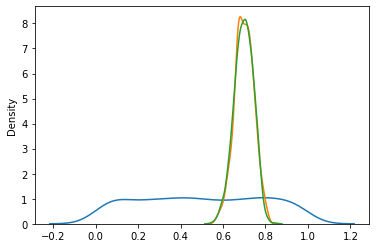

In [51]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='beta') #prior a=1, b=1
sns.kdeplot(random.beta(a=70, b=30, size=1000), label='beta') #likelihood a=70, b=100-70 (n=100, k=30)
sns.kdeplot(random.beta(a=71, b=31, size=1000), label='beta') #posterior a=70+1, b=100-70+1
plt.show()

그림에서 보듯이, 사후확률의 분포는 오른쪽으로 움직이고 폭이 더욱 좁아졌다.
이는 100에서 70회가 앞면이 나왔다는 사실에 더욱 확신이 증가했다는 의미이다.
평균은0.696 표준편차는 0.045, 그러니까 동전은 69.6%는 앞면이 나올 것이, 표준편차는 불과 0.045라는 의미이다.

이와 같이 가능도의 분포가 베타분포이면, 컬레확률로 사전확률과 사후확률이 베타분포를 따르고 있다.

In [52]:
import math

a=71 #posterior a=70+1, b=100-70+1 (n=100, k=30)
b=31
mu=a/(a+b)
std=math.sqrt(a*b/(math.pow(a+b,2)*(a+b+1)))
f"mean: {mu:.3f} std:{std:.3f}"


'mean: 0.696 std:0.045'

### Sklearn

"Seoul", "Jongro", "Gangnam"은 한국, "Sydney","NY"는 외국이라고 이진분류하는 문제이다.

In [53]:
import numpy as np

city_list = ["Seoul", "Jongro", "Sydney", "Gangnam", "NY"]
feature1 = [1, 0, 0, 0, 0]
feature2 = [0, 1, 0, 1, 0]
feature3 = [0, 0, 1, 0, 0]
feature4 = [0, 0, 0, 1, 0]
feature5 = [0, 0, 1, 0, 1]
feature6 = [1, 1, 0, 0, 0]
labels = [1, 1, 0, 1, 0, 1]

numpy 배열로 6건 x 속성 5로 구성한다.

In [54]:
trainData = np.array([feature1, feature2, feature3, feature4, feature5, feature6])

In [55]:
trainData.shape

(6, 5)

```BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)```
* ```alpha```는 스무딩을 할 것인지 기본값은 1.0, 스무딩하지 않는 경우 0
* ```binarize```는 이분화를 할 경우의 임계치를 말한다. 기본 값은 0.0, 이미 이분화가 되어 있는 경우에는 None이라고 해준다.
* ```fit_prior```는 사전확률을 학습할 것인지, 기본 값은 true, false로 하면 균등분포가 사용된다.
* ```class_prior```는 클래스에 대한 사전확률

In [56]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

In [57]:
clf.fit(trainData, labels)

BernoulliNB()

모델링에 사용되었던 데이터를 그대로 예측해보자.
```labels = [1, 1, 0, 1, 0, 1]```과 동일한 결과를 출력한다.

In [58]:
clf.predict(trainData)

array([1, 1, 0, 1, 0, 1])

다음 한국만, 또는 한국과 외국이 혼합된 경우를 예측해보자.
* (1) Sydney, Gangnam, NY이 1로 한국, 외국이 혼합된 [0, 0, 1, 1, 1] 경우,
* (2) Seoul, Gangnam이 1로 한국만 포함된 [1, 0, 0, 1, 0] 경우
* (3) Seoul, Jongro, Sydney 한국과 외국이 혼합된 [1, 1, 1, 1, 0] 경우

In [59]:
testData=np.array([[0, 0, 1, 1, 1], [1, 0, 0, 1, 0], [1, 1, 1, 1, 0]])

예측하면 (1)의 경우는 0 (외국), (2)는 1 (한국), (3)은 1 (한국)으로 예측된다.
(1)은 외국이 한국보다 많아서, (3)은 한국이 많아서 설정된 가중치에 따라 추론된다.

In [60]:
clf.predict(testData)

array([0, 1, 1])

정확성은 trainData에 대해 측정한다. trainData는 label이 붙여져 있고, 반면에 testData는 label이 없다.

In [61]:
clf.score(trainData,labels)

1.0

testData에 대해 정확성을 측정하려면, label 데이터를 넣어주어야 한다.
이런 작업, 각 사례에 대해 한국인지 외국인지 판정하는 작업이 필요하다.
대량 데이터를 훈련하기 위해서는, 지도기계학습에서는 필수적으로 해야하고 상당한 시간과 노력이 필요할 수 있다.

In [62]:
clf.score(testData, [0, 1, 1])

1.0

predict_proba()는 확률추정치를 출력한다.
각 feature에 대한 가중치 역할을 하게 되고, 앞서 한국, 외국이 혼합된 사례의 추론의 이유이기도 하다.

In [63]:
clf.predict_proba(trainData)

array([[0.09194098, 0.90805902],
       [0.03264813, 0.96735187],
       [0.8200225 , 0.1799775 ],
       [0.09194098, 0.90805902],
       [0.95795007, 0.04204993],
       [0.03264813, 0.96735187]])

In [64]:
pr=clf.predict_proba(trainData)

In [65]:
pr.shape, testData.shape

((6, 2), (3, 5))

## 문제: Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델

Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.

```python
sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
```
* n_samples: 표본 데이터의 수
* n_features: 독립 변수의 수
* n_informative: 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
* n_redundant: 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
* n_repeated : 독립 변수 중 단순 중복된 성분의 수
* n_classes : 종속 변수의 클래스 수
* n_clusters_per_class : 클래스 당 클러스터의 수
* weights : 각 클래스에 할당된 표본 수
* random_state : 난수 발생 시드

단, n_informative + n_redundant + n_repeated <= n_features이어야 한다.

Sklearn으로 이진 베이지안 모델링을 해보자.
* (1) X, Y 데이터를 생성
* (2) X의 평균과 표준편차 계산해서 출력
* (3) 그래프 작성
    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.
* (4) 훈련데이터, 테스트데이터 3:1로 분리
* (5) 훈련데이터에 대하여 BernoulliNB 모델링
    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.
* (6) 테스트데이터에 대하여 예측값을 출력
    * 예측이 맞는지 실제값 Y와 비교해보자.
* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

### 데이터

2개의 속성을 적당한 상관관계를 가진 값으로 설정하여 100개의 데이터를 생성한다.

In [17]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [16]:
X[:5]

array([[ 0.96255227, -0.68490584],
       [-0.11077626,  2.22517758],
       [-0.7549931 , -2.44458057],
       [ 1.73518271, -1.19390865],
       [ 1.15665994, -0.79632483]])

In [19]:
Y[:5]

array([0, 1, 0, 0, 1])

### 평균, 표준편차

X는 numpy array이다. 평균과 표준편차를 출력해보자.

In [39]:
X.mean(), X.std()

(0.01530284994603548, 1.2082428010152255)

### 그래프

Y값에 따라 다른 색으로 그리기 위해서는 ```c=Y```라고 설정해준다.
```s```는 마커의 크기, 제곱으로 표현할 수 있다.

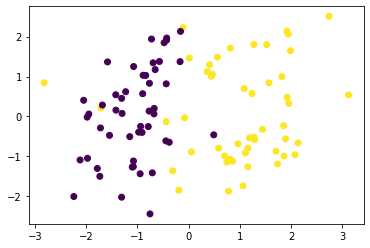

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

### 데이터 분할

데이터는 연속 값이다. 이 경우 ```binarize``` 설정을 해서, 임계치를 0.0을 사용해서 이분화한다.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### BernoulliNB

In [66]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

### 예측

25개 가운데 3개 오류가 발생하였다. 정확성은 1 - 3/25 = 0.88이다.

In [67]:
list(zip(bnb.predict(X_test),Y_test, X_test))

NameError: name 'X_test' is not defined

이진 값을 넣어서 예측값을 출력해보자.

### 정확성

## 5.7 정규분포 베이지안

**정규모델 Normal Bayesian**은 아래 몸무게, 키, 발크기로 성별을 구분하는 문제이고, 정규분포를 사용한다

height=6ft, weight=130lbs, foot size=8inches 경우 성별을 추론해보자.
키, 몸무게와 같은 연속적 변수이고, 분포 distribution에 따라 무작위로 발생한다.

* source: http://en.wikipedia.org/wiki/Naive_Bayes_classifier

| sex	 | height(feet) | weight(lbs) | foot size(inches) |
|--------|-----:|----:|---:|
| male   | 6    | 180 | 12 |
| male   | 5.92 | 190 | 11 |
| male   | 5.58 | 170 | 12 |
| male   | 5.92 | 165 | 10 |
| female | 5    | 100 |  6 |
| female | 5.5  | 150 |  8 |
| female | 5.42 | 130 |  7 |
| female | 5.75 | 150 |  9 |


### (1) 데이터 준비

numpy 구조 배열로 데이터를 생성하자.

In [68]:
import numpy as np
_hwf = np.array([
        ('male',6,180,12),
        ('male',5.92,190,11),
        ('male',5.58,170,12),
        ('male',5.92,165,10),
        ('female',5,100,6),
        ('female',5.5,150,8),
        ('female',5.42,130,7),
        ('female',5.75,150,9)],
        dtype=[('sex', 'U6'), ('height', 'f4'), ('weight', 'i4'), ('foot', 'i4')
])

### (2) 사전확률

사전확률은 전체 개수를 'male', 'female' 개수로 나눈 값이다.
위 데이터에서 남녀의 확률 (즉 4/8), 0.5이다.
또는 P(M), P(F)은 인구통계에서 보면 남녀 모두 0.5라고 봐도 무방하다. 

In [69]:
pr_m=0.5
# p(height|M) ~ N(6,남자키평균,남자키표준편차), 즉 N(6,5.855,0.187)
pr_f=0.5

In [70]:
prior_m = np.count_nonzero(_hwf['sex']=='male')/_hwf.shape[0]
prior_f = np.count_nonzero(_hwf['sex']=='female')/_hwf.shape[0]
f"prior_m: {prior_m}, prior_f: {prior_f}"

'prior_m: 0.5, prior_f: 0.5'

### (3) 가능도

확률을 구하기 위해서는 분포를 추정해야 한다. 남녀의 키, 몸무게, 발길이 정규분포로 볼 수 있다.
정규분포 확률을 계산하기 위해 평균, 표준편차이 필요하다.

#### (3-1) 정규분포 확률계산에 필요한 평균, 표준편차 계산

In [71]:
import pandas as pd
pdf=pd.DataFrame(_hwf)

In [72]:
pdf.groupby('sex').mean()

,height,weight,foot
sex,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [73]:
pdf.groupby('sex').std()

,height,weight,foot
sex,,,
female,0.311809,23.629078,1.290994
male,0.187172,11.086779,0.957427


#### (3.2) 확률 계산

남자의 경우 키가 6 feet일 확률 Pr(Height=6|Male)을 계산해보자.
이런 연속변수의 확률은 normpdf를 계산해서 구한다.
정규분포의 확률밀도함수 (pdf, Probability Dense Function)는:

$\frac{\displaystyle 1}{\displaystyle \sigma \sqrt{2\pi}}
e^{-\frac{\displaystyle 1}{\displaystyle 2}(\frac{\displaystyle x-\mu}{\displaystyle \sigma})^2}$

In [74]:
# 함수로 만들기
def normpdf(x, mu=0, std=1):
    n = float(x-mu) / abs(std)
    g = np.exp(-n*n/2) / (abs(std) * np.sqrt(2*np.pi))
    return g

#### male

In [76]:
mean_h_m=_hwf['height'][_hwf['sex']=='male'].mean()
std_h_m=_hwf['height'][_hwf['sex']=='male'].std(ddof=1)
pr_h_m=normpdf(6, mean_h_m, std_h_m) #1.5788829647561371, 확률이 아니라 확률분포값
f"Pr(Height|Male): {pr_h_m:.4f}, mean_h_m: {mean_h_m:.4f}, std_h_m: {std_h_m:.4f}"

'Pr(Height|Male): 1.5789, mean_h_m: 5.8550, std_h_m: 0.1872'

In [77]:
mean_f_m=_hwf['foot'][_hwf['sex']=='male'].mean() #11.25
std_f_m=_hwf['foot'][_hwf['sex']=='male'].std(ddof=1) #0.957
pr_f_m=normpdf(8, std_f_m, std_f_m) #0.0013050759944537563
f"pr_h_m: {pr_f_m:.4f}, mean_h_m: {mean_f_m:.4f}, std_h_m: {std_f_m:.4f}"

'pr_h_m: 0.0000, mean_h_m: 11.2500, std_h_m: 0.9574'

In [78]:
mean_w_m=_hwf['weight'][_hwf['sex']=='male'].mean() #176.25
std_w_m=_hwf['weight'][_hwf['sex']=='male'].std(ddof=1) #11.0868
pr_w_m=normpdf(130, mean_w_m, std_w_m) #5.9869297985549439e-06
f"pr_w_m: {pr_w_m:.8f}, mean_w_m: {mean_w_m:.4f}, std_w_m: {std_w_m:.4f}"

'pr_w_m: 0.00000599, mean_w_m: 176.2500, std_w_m: 11.0868'

#### female

In [86]:
mean_h_f=_hwf['height'][_hwf['sex']=='female'].mean() #5.4175
std_h_f=_hwf['height'][_hwf['sex']=='female'].std(ddof=1) #0.311809
pr_h_f=normpdf(6,mean_h_f,std_h_f) #0.2235
f"Pr(Height|Female): {pr_h_f:.4f}, mean_h_f: {mean_h_f:.4f}, std_h_f: {std_h_f:.4f}"

'Pr(Height|Female): 0.2235, mean_h_f: 5.4175, std_h_f: 0.3118'

In [87]:
mean_f_f=_hwf['foot'][_hwf['sex']=='female'].mean() #7.5
std_f_f=_hwf['foot'][_hwf['sex']=='female'].std(ddof=1) #1.291
pr_f_f=normpdf(8,mean_f_f,std_f_f) #0.2867
f"Pr(Foot|Female): {pr_f_f:.4f}, mean_f_f: {mean_f_f:.4f}, std_f_f: {std_f_f:.4f}"

'Pr(Foot|Female): 0.2867, mean_f_f: 7.5000, std_f_f: 1.2910'

In [85]:
mean_w_f=_hwf['weight'][_hwf['sex']=='female'].mean() #132.5
std_w_f=_hwf['weight'][_hwf['sex']=='female'].std(ddof=1) #23.629
pr_w_f=normpdf(130,mean_w_f,std_w_f) #0.0168
f"Pr(Weight|Female): {pr_w_f:.4f}, mean_w_f: {mean_w_f:.4f}, std_w_f: {std_w_f:.4f}"

'Pr(Weight|Female): 0.0168, mean_w_f: 132.5000, std_w_f: 23.6291'

### (4) 사후확률

$
posterior(M)=\frac{P(M)\ p(height|M)\ p(weight|M)\ p(foot size|M)}{evidence}\\
posterior(F)=\frac{P(F)\ p(height|F)\ p(weight|F)\ p(foot size|F)}{evidence}
$

위 식에서 Evidence는 이 값은 상수 값이므로, 사후확률 계산에서 제외한다.

In [90]:
post_m=pr_m * pr_h_m * pr_f_m * pr_w_m #6.1682207841818461e-09
post_f=pr_f*pr_h_f*pr_w_f*pr_f_f #0.00053778969521895402
f"사후확률 male: {post_m:.10f}, 사후확률 female: {post_f:.10f}"

'사후확률 male: 0.0000000000, 사후확률 female: 0.0005377909'

### (5) 추론

4. argmax를 구하면 1, 즉 post_f일 확률이 높으므로, 여성이라고 구분함.

In [91]:
np.argmax([post_m,post_f]) #1 즉 female로 예측.

1

### (6) Sklearn

```python
GaussianNB(*, priors=None, var_smoothing=1e-09)
```
* 사전확률
* smoothing

#### 데이터

In [96]:
X=_hwf[:][['height', 'weight', 'foot']]
y=_hwf[:]['sex']
X

array([(6.  , 180, 12), (5.92, 190, 11), (5.58, 170, 12), (5.92, 165, 10),
       (5.  , 100,  6), (5.5 , 150,  8), (5.42, 130,  7), (5.75, 150,  9)],
      dtype={'names':['height','weight','foot'], 'formats':['<f4','<i4','<i4'], 'offsets':[24,28,32], 'itemsize':36})

튜플리스트를 2차원 리스트로 변환해주자.

In [97]:
X = [list(x) for x in X]

In [94]:
X

[[6.0, 180, 12],
 [5.92, 190, 11],
 [5.58, 170, 12],
 [5.92, 165, 10],
 [5.0, 100, 6],
 [5.5, 150, 8],
 [5.42, 130, 7],
 [5.75, 150, 9]]

In [95]:
y

array(['male', 'male', 'male', 'male', 'female', 'female', 'female',
       'female'], dtype='<U6')

#### GaussianNB

In [98]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)
Y_gnb_score = gnb.predict_proba(X)

In [99]:
Y_gnb_score

array([[1.01445408e-06, 9.99998986e-01],
       [1.68038573e-05, 9.99983196e-01],
       [7.74236193e-05, 9.99922576e-01],
       [5.73512178e-03, 9.94264878e-01],
       [1.00000000e+00, 4.96400751e-27],
       [9.99992023e-01, 7.97745444e-06],
       [1.00000000e+00, 2.62669718e-12],
       [9.82692514e-01, 1.73074857e-02]])

클래스를 출력할 수 있다.

In [100]:
gnb.classes_

array(['female', 'male'], dtype='<U6')

In [101]:
gnb.class_count_

array([4., 4.])

In [102]:
gnb.class_prior_

array([0.5, 0.5])

In [ ]:
평균

In [103]:
gnb.theta_

array([[  5.41750002, 132.5       ,   7.5       ],
       [  5.85500002, 176.25      ,  11.25      ]])

In [ ]:
표준편차

In [105]:
gnb.var_

array([[7.29194841e-02, 4.18750001e+02, 1.25000073e+00],
       [2.62757494e-02, 9.21875007e+01, 6.87500734e-01]])

####  예측

In [106]:
gnb.predict([[6,130,8],[6,180,12]])

array(['female', 'male'], dtype='<U6')

## 5.8 다항 베이지안 multinomial Bayesian

**다항모델 Multinomial Bayesian**은 앞서 이항분포가 사건의 발생여부에 따른 이진적이었다면, 다항분포는 단어의 발생빈도에 따라 문서를 분류하는 문제를 예로 들 수 있다. 단어가 1번 발생할 확률, 2번 발생할 확률을 계산하게 된다.


###  계산

속성의 집합 x = (x1,...,xn), 그리고 Ck (k개의 클래스), 추론은 최대의 사후확률 $p(C_k | x_1,\ldots,x_n)$로 결정된다.

$posterior = \frac{prior \times likelihood}{evidence}$

$P(C_k \vert x) = \frac{P(C_k) \ P(x \vert C_k)}{P(x)}$

$
\begin{align}
P(C_k \vert x_1, \dots, x_n)
    & \varpropto P(C_k, x_1, \dots, x_n) \\
    & \varpropto P(C_k) P(x_1 \vert C_k) \
         P(x_2\vert C_k) P(x_3\vert C_k) \cdots \\
    & \varpropto P(C_k) \prod_{i=1}^n P(x_i \vert C_k)
\end{align}
$


### 예제

문서가 다음가 같이 주어졌다고 하자.
문서는:
* **문장**으로 분리한다. 이 경우 문장을 나누는 기준이 단순히 '.'으로 분리하기 쉽지 않을 수 있다. Mr. 같은 약어에 점을 포함되거나, 의문부호로 문장을 끝내거나, 마침표로 끝내지 않는 경우도 있기 때문이다.
* **단어**로 분리한다. 단어로 분리되면, Bag of Words 모델에 따라, 단어의 앞 뒤에 무엇이 왔는지 무시되고, 오로지 단어의 집합으로 구성된다.
* **품사**도 식별할 필요가 있다. 한국어는 조사가 붙어 격변화를 하고, 형용사도 다양하게 변화하므로 어근을 추출해 사용하기도 한다.
* **불용어**는 제거해준다.

이렇게 추출된 단어로 word vector를 생성한다. word vector는 (단어 key, 값 value)로 구성되면, 이 경우 값은 단어존재, 단어빈도, TF-IDF 등이 사용된다.

베이지안과 같은 지도기계학습을 적용하기 위해서는, 각 문서에 대해 분류가 선행되어야 한다. 이를 위해서 별도로 판정 작업이 필요하다.
문서 1, 3, 4, 6, 8, 9는 부정적, 반면에 문서2, 5, 7, 10 4건은 긍정적이다.
부정의 label은 0, 긍정의 label은 1로 하자.

문서번호 | 문서 | 단어 | 클래스
-----|------|------|------
1 | I am sorry he has fleas poor dog | 'sorry','fleas','poor','dog' | 1
2 | take the dog to the park my dog would love it | 'dog','park','dog','love' | 0
3 | quit posting stupid worthless garbage | 'quit','posting','stupid','worthless','garbage' | 1
4 | my dog has fleas quit buying worthless dog food stupid' | 'dog','fleas','quit','buying','worthless','dog','food','stupid' | 1
5 | dog is so cute I love him | 'dog','cute','love' | 0
6 | 강아지 벼룩 미안해 불쌍해 | '강아지','벼룩','미안해','불쌍해' | 1
7 | 강아지 공원 강아지 좋아해 | '강아지','공원','강아지','좋아해' | 0
8 | 멍청하게 쓸데없는 쓰레기 포스팅 | '멍청하게','쓸데없는','쓰레기','포스팅' | 1
9 | 강아지 벼룩 쓸데없는 강아지 음식 사지마 멍청하게 | '강아지','벼룩','쓸데없는','강아지','음식','사지마','멍청하게' | 1
10 | 강아지 귀여워 좋아해 | '강아지','귀여워','좋아해' | 0
11 | my love my dog has fleas poor dog | 'dog','dog','fleas','love','poor' | ?
12 | 강아지 벼룩 멍청하게 | '강아지','벼룩', '멍청하게' | ?


#### 사전확률

* 총문서 10건
    * 문서(0)은 4
    * 문서(1)은 6

* P(1) prior = $\frac{N_1}{N} = \frac{6}{10} = 0.6$ 총 10개 문서 중 6개
* P(0) prior = $\frac{N_0}{N} = \frac{4}{10} = 0.4$ 총 10개 문서 중 4개

#### 조건확률

* 전체 단어빈도 46 (영어 24 + 한글 22)
    * 긍정(0)일때 전체 단어빈도 14 (중복제거 8: 'dog','park','love','cute','강아지','공원','좋아해','귀여워')
    * 부정(1)일때 전체 단어빈도 32 (중복제거 21: 'sorry','fleas','poor','dog','quit','posting','stupid','worthless','garbage' ,'buying','food','강아지','벼룩','미안해','불쌍해','멍청하게','쓸데없는','쓰레기','포스팅','음식','사지마')
* 전체 단어빈도 (중복제거) 27 (영어: 4 + 2 + 5 + 2 + 1, 한글: 4 + 2 + 4 + 2 + 1 = 14 + 13)

'sorry'의 조건확률
* P(sorry|1) = $\frac{N_{sorry|1} + 1}{N_1 + N_{voca}} = \frac{1+1}{32+27} = 0.03389831$

'dog'의 조건확률이다. 이 단어는 양 쪽에 모두 3회 나타난다.
* P(dog|0) = $\frac{N_{dog|0} + 1}{N_1 + N_{voca}} = \frac{3+1}{14+27} = 0.09756098$
* P(dog|1) = $\frac{N_{dog|1} + 1}{N_1 + N_{voca}} = \frac{3+1}{32+27} = 0.06779661$

'쓸데없는' 단어의 조건확률이다.
* P(쓸데없는|0) = $\frac{N_{쓸데없는|0} + 1}{N_1 + N_{voca}} = \frac{0+1}{14+27} = 0.02439024$
* P(쓸데없는|1) = $\frac{N_{쓸데없는|1} + 1}{N_1 + N_{voca}} = \frac{2+1}{32+27} = 0.05084746$

#### 예측

dog 2회, fleas, love, poor를 예측하면
* post1 = prior1 x likelihood1 = prior1 x p(dog|1) x p(dog|1) x p(fleas|1) x p(poor|0) x p(love|0)
* post0 = prior1 x likelihood1 = prior0 x p(dog|0) x p(dog|0) x p(fleas|0) x p(poor|0) x p(love|0)

이 계산에 필요한 조건부 확률은:
* p(dog|0) = 0.09756098
* p(fleas|0) = 0.02439024
* p(poor|0) = 0.02439024
* p(love|0) = 0.07317073

* p(dog|1) = 0.06779661
* p(fleas|1) = 0.05084746
* p(poor|1) = 0.03389831
* p(love|1) = 0.01694915

In [107]:
import math
# dog^2 * fleas * poor * love
print("post0: {:.16f}".format(0.4*math.pow(0.09756098,2)*0.02439024*0.02439024*0.07317073))
# dog^2 * fleas * poor * love
print("post1: {:.16f}".format(0.6*math.pow(0.06779661,2)*0.05084746*0.03389831*0.01694915))

post0: 0.0000001657226369
post1: 0.0000000805679737


0일 경우의 사후확률 post0: 0.0000001657226369은 1일 경우의 사후확률 post1: 0.0000000805679737보다 크다. 그러므로 0으로 결정하게 된다.

### 데이터

앞서 구성한 텍스트 데이터를 가지고, d1, ..., d10을 구성한다.
d1, d3, d4, d6, d8, d9는 부정적이고 d2, d5, d7, d10 4건은 긍정적이다.

In [108]:
postingList=[['sorry','fleas','poor','dog'],
             ['dog','park','dog','love'],
             ['quit','posting','stupid','worthless','garbage'],
             ['dog','fleas','quit','buying','worthless','dog','food','stupid'],
             ['dog','cute','love'],
             ['강아지','벼룩','미안해','불쌍해'],
             ['강아지','공원','강아지','좋아해'],
             ['멍청하게','쓸데없는','쓰레기','포스팅'],
             ['강아지','벼룩','쓸데없는','강아지','음식','사지마','멍청하게'],
             ['강아지','귀여워','좋아해']]
classVec = [1,0,1,1,0,1,0,1,1,0]

### (1) 단어목록

#### 단어의 목록은 집합으로

단어목록은 set로 선언하여, 중복이 없는 단어들을 저장한다.

In [109]:
vocabSet=set([])

add() 함수로 set에 단어들을 저장할 수 있다.

In [110]:
vocabSet.add("Seoul")
f"vacabSet: {vocabSet}"

"vacabSet: {'Seoul'}"

그러나 배열과 다른 특징이 있다. set은 중복을 허용하지 않는다. 동일한 문자열을 또 입력해도, 하나만 보관된다.

In [111]:
vocabSet.add("Seoul")
f"vacabSet: {vocabSet}"

"vacabSet: {'Seoul'}"

다시 깨끗하게 비우고 시작하자.

In [112]:
vocabSet.clear()
f"vacabSet: {vocabSet}"

'vacabSet: set()'

#### 합집합
문서로부터 단어를 하나씩 추가하는데, 이미 있는 단어가 등장하는 경우가 흔하다.
따라서 중복을 막기 위해, union 연산 "|"으로 합집합을 구하게 된다.

In [113]:
citiesA = set(["Seoul","Sydney","Tokyo"])
citiesB = set(["Seoul","New York"])
citiesAll = citiesA|citiesB
print(citiesAll)

{'Tokyo', 'Sydney', 'New York', 'Seoul'}


한 줄씩 단어를 가져와 set()로 중복이 없도록 골라내고, 현재의 vacabSet에 더해가면서 중복이 없는 단어의 목록으로 구성한다.

In [114]:
for doc in postingList:
    #vocaSet = vocaSet.union(set(doc))
    vocabSet=vocabSet | set(doc)

중복이 없는, 단어의 갯수와 목록을 출력할 수 있다.

In [115]:
print ("n of vocab: {0}\nvoca: {1}\n".format(len(vocabSet),vocabSet))

n of vocab: 27
voca: {'fleas', '포스팅', 'park', 'sorry', '불쌍해', 'love', 'posting', 'stupid', 'dog', 'worthless', 'food', '멍청하게', 'quit', '미안해', '사지마', 'garbage', 'poor', '강아지', '귀여워', '공원', '벼룩', '쓰레기', 'buying', '좋아해', 'cute', '쓸데없는', '음식'}



### (2) 단어 벡터

단어벡터 Word Vector는 단어빈도로 구성된 배열을 말한다.
이를 구성하기 위해서는:
* **중복되지 않는 단어목록**을 구하고, 몇 개의 단어인지 알아낸다.
* 단어의 수만큼 단어벡터를 만들고, **초기화**한다.
* 문서의 단어벡터에 **단어빈도**를 입력한다.
* 모든 문장에 단어별 빈도를 저장한 **단어벡터**를 생성한다.

#### 단어벡터 크기 결정해서 초기화

vocabSet는 중복되지 않는 단어목록을 가지고 있다.
set은 리스트와 달리 순서가 없는 특징이 있으므로 **indexing**기능을 사용할 수 없다.
우리는 단어의 indexing이 필요하므로 set을 리스트로 변환해서 사용하자.

In [116]:
vocabList=list(vocabSet)

그 수만큼 단어벡터의 크기를 정하자.
0으로 초기화한다.

In [117]:
#wordVec = [0]*len(vocabList)
wordVec = [0]*len(vocabSet)

출력해보면, 앞서 찾아낸 중복없는 단어의 갯수만큼 word vector가 설정된다.

In [118]:
print("wordVec: {}".format(wordVec))

wordVec: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 한 문장을 단어벡터로 만들어 보기

문장은 이미 단어로 분리되어 있다. 단어별로 초기화된 단어벡터에 빈도를 입력해보자.
빈도는 단순히 1로 하거나, 발생빈도를 그대로 적을 수 있다.
**단어목록에 없는 경우**에는 문제가 된다. 앞서 단어목록을 만들면서 빼먹은 경우인데, 새로 문장이 등장하면 그런 경우가 발생할 수 있다.

In [119]:
for word in postingList[1]:
    if word in vocabList:
        print ("...inserting '{}'".format(word))
        #returnVec[vocabList.index(word)] = 1 # 0 if none, 1 if exists
        wordVec[vocabList.index(word)] += 1 # num of frequencies
    else:
        print ("the word: %s is not in my Vocabulary!".format(word))

...inserting 'dog'
...inserting 'park'
...inserting 'dog'
...inserting 'love'


위 단어벡터의 단어 순서대로 빈도가 적혀졌다. 발생한 빈도가 적혀지니까, 2회 발생한 경우는 2로 1회는 1로 적힌다.

In [120]:
print ("len: {} word vector: {}".format(len(wordVec), wordVec))

len: 27 word vector: [0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 함수로 만들기

단어벡터를 만드는 기능은 모든 문서에 대해 실행되어야 한다.
앞서 단어벡터 만드는 작업을 함수로 만들어 실행하자.

In [121]:
# define function setOfWords2Vec
def setOfWords2Vec(vocabList, inputSet):
    wordVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            #wordVec[vocabList.index(word)] = 1 # 0 if none, 1 if exists
            wordVec[vocabList.index(word)] += 1 # num of frequencies
        else: print ("the word: '{}' is not in my Vocabulary!".format(word))
    return wordVec

#### 단어벡터 생성

모든 문장에 대해 단어별 빈도를 저장한 훈련단어벡터를 생성해 보자.

In [122]:
trainMat=[]
for postinDoc in postingList:
    trainMat.append(setOfWords2Vec(vocabList, postinDoc))

훈련단어벡터를 출력하면, 문장의 수 6개별로 단어의 수 32개에 대해 빈도를 0, 1로 표시하여 출력하고 있다.

In [123]:
f"word vector: {trainMat}"

'word vector: [[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]]'

### (3) 사전확률


In [16]:
# trainNB0
# nword_doc-np.zeros([nword,ndoc])
numTrainDocs=len(trainMat) #6

In [17]:
f"num of Train Docs: {numTrainDocs}"

'num of Train Docs: 10'

In [18]:
classVec.count(1)

6

In [19]:
prior1 = classVec.count(1)/numTrainDocs
prior0 = classVec.count(0)/numTrainDocs

In [20]:
f"prior for 1: {prior1} prior for 0: {prior0}"

'prior for 1: 0.6 prior for 0: 0.4'

### (4) 우도

$\frac{\displaystyle 해당단어빈도 numWords + 1}{\displaystyle 총단어빈도 totalNumWords + 고유단어수 vocab}$


#### 고유단어수

In [23]:
V=len(vocabSet)

In [24]:
f"Num of unique words: {V}"

'Num of unique words: 27'

#### 클래스별 총단어빈도, 해당 단어빈도

분모, 분자로 나누어 계산한다.
분모는 클래스별 총단어빈도를,
분자에는 해당 단어빈도를 계산한다.

In [25]:
import numpy as np

p0Num = np.zeros(V)
p1Num = np.zeros(V)
p0Denom = 0.0
p1Denom = 0.0  # numWords with repetition

우도의 분모, 분자를 구한다.
각 클래스의 전체 단어수와 해당 훈련데이터의 단어빈도를 구한다.

In [26]:
for i in range(numTrainDocs):
    if classVec[i] == 1:
        p1Num += trainMat[i]
        p1Denom += sum(trainMat[i])
        print ("{}. class:{} 빈도합:{}".format(i,classVec[i],p1Num))
    else:
        p0Num += trainMat[i]
        p0Denom += sum(trainMat[i])
        print ("{}. class:{} 빈도합:{}".format(i,classVec[i],p0Num))

0. class:1 빈도합:[1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1.]
1. class:0 빈도합:[0. 0. 1. 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
2. class:1 빈도합:[1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1.]
3. class:1 빈도합:[2. 0. 0. 0. 1. 1. 0. 0. 0. 3. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 2. 2. 1.
 2. 0. 1.]
4. class:0 빈도합:[0. 0. 1. 2. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.]
5. class:1 빈도합:[2. 0. 0. 0. 1. 1. 1. 0. 0. 3. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 2. 2. 1.
 2. 0. 1.]
6. class:0 빈도합:[0. 0. 1. 2. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 0.
 0. 1. 0.]
7. class:1 빈도합:[2. 0. 0. 0. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 2. 2. 1.
 2. 0. 1.]
8. class:1 빈도합:[2. 1. 0. 0. 1. 1. 1. 2. 2. 3. 1. 1. 2. 1. 0. 1. 1. 1. 3. 0. 0. 2. 2. 1.
 2. 0. 1.]
9. class:0 빈도합:[0. 0. 1. 2. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 1. 0. 0. 0. 3. 1. 2. 0. 0. 0.
 0. 1. 0.]


위 코드에서 각 클래스의 총단어빈도를 계산하였다.
**총단어빈도**는 클래스 0에 14개, 클래스2에 32개이다.
단 이들은 중복이 허용된 숫자이므로, 합한다고 해서 vacabSet에 있는 27과 같지 않다.
분자인 단어빈도를 모두 더하면 당연히 분모인 총단어빈도가 된다.

자, 이제 계산을 해보자.
* 0에 대해, p0Denom은 총단어빈도에 해당하고 14이다.
3번째 값은 단어빈도 1이다. 이를 총단어빈도 14로 나누어 계산한다.
```python
0.07142857 = 1/14 (단어빈도/총단어빈도)
```

* 1에 대해서도 마찬가지이다. 단어빈도 1인경우 총단어빈도 32로 나누어 계산한다.
```python
0.03125 = 1/32 (단어빈도/총단어빈도)
```

In [27]:
p1Vect = p1Num/p1Denom
p0Vect = p0Num/p0Denom

In [28]:
print ("---p0:\np0Num=\n{0}\np0Denom={1}\np0Vect\n{2}".format(p0Num, p0Denom, p0Vect))

---p0:
p0Num=
[0. 0. 1. 2. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 1. 0. 0. 0. 3. 1. 2. 0. 0. 0.
 0. 1. 0.]
p0Denom=14.0
p0Vect
[0.         0.         0.07142857 0.14285714 0.         0.
 0.         0.         0.         0.21428571 0.         0.
 0.         0.         0.07142857 0.         0.         0.
 0.21428571 0.07142857 0.14285714 0.         0.         0.
 0.         0.07142857 0.        ]


In [29]:
print ("---p1:\n p1Num=\n{0}\np1Denom={1}\np1Vect\n{2}".format(p1Num, p1Denom, p1Vect))

---p1:
 p1Num=
[2. 1. 0. 0. 1. 1. 1. 2. 2. 3. 1. 1. 2. 1. 0. 1. 1. 1. 3. 0. 0. 2. 2. 1.
 2. 0. 1.]
p1Denom=32.0
p1Vect
[0.0625  0.03125 0.      0.      0.03125 0.03125 0.03125 0.0625  0.0625
 0.09375 0.03125 0.03125 0.0625  0.03125 0.      0.03125 0.03125 0.03125
 0.09375 0.      0.      0.0625  0.0625  0.03125 0.0625  0.      0.03125]


이제 스무딩을 해보자.
스무딩을 하지 않으면 0으로 연산하면서 문제가 될 수 있다.

In [30]:
p1Vect=(p1Num+1)/(p1Denom+V)
p0Vect=(p0Num+1)/(p0Denom+V)

In [31]:
print ("---p0:\np0Num=\n{0}\np0Denom={1}\np0Vect\n{2}".format(p0Num+1, p0Denom+V, p0Vect))

---p0:
p0Num=
[1. 1. 2. 3. 1. 1. 1. 1. 1. 4. 1. 1. 1. 1. 2. 1. 1. 1. 4. 2. 3. 1. 1. 1.
 1. 2. 1.]
p0Denom=41.0
p0Vect
[0.02439024 0.02439024 0.04878049 0.07317073 0.02439024 0.02439024
 0.02439024 0.02439024 0.02439024 0.09756098 0.02439024 0.02439024
 0.02439024 0.02439024 0.04878049 0.02439024 0.02439024 0.02439024
 0.09756098 0.04878049 0.07317073 0.02439024 0.02439024 0.02439024
 0.02439024 0.04878049 0.02439024]


In [34]:
print ("---p1:\n p1Num=\n{0}\np1Denom={1}\np1Vect\n{2}".format(p1Num, p1Denom, p1Vect))

---p1:
 p1Num=
[2. 1. 0. 0. 1. 1. 1. 2. 2. 3. 1. 1. 2. 1. 0. 1. 1. 1. 3. 0. 0. 2. 2. 1.
 2. 0. 1.]
p1Denom=32.0
p1Vect
[0.05084746 0.03389831 0.01694915 0.01694915 0.03389831 0.03389831
 0.03389831 0.05084746 0.05084746 0.06779661 0.03389831 0.03389831
 0.05084746 0.03389831 0.01694915 0.03389831 0.03389831 0.03389831
 0.06779661 0.01694915 0.01694915 0.05084746 0.05084746 0.03389831
 0.05084746 0.01694915 0.03389831]


'dog'은 양쪽에 각 3회씩 등장한다. 우도를 구해보면 각 p(dog|0)=0.09756098, p(dog|1)=0.06779661 이다.
* P(dog|0) = $\frac{N_{dog|0} + 1}{N_1 + N_{voca}} = \frac{3+1}{14+27} = 0.09756098$
* P(dog|1) = $\frac{N_{dog|1} + 1}{N_1 + N_{voca}} = \frac{3+1}{32+27} = 0.06779661$

단어벡터의 2번째 위치를 차지하는 '쓸데없는'은 부정(1)인 경우에만 등장한다.
* P(쓸데없는|0) = $\frac{N_{쓸데없는|0} + 1}{N_1 + N_{voca}} = \frac{0+1}{14+27} = 0.02439024$
* P(쓸데없는|1) = $\frac{N_{쓸데없는|1} + 1}{N_1 + N_{voca}} = \frac{2+1}{32+27} = 0.05084746$

이때 주의해야 할 점은, 인덱스 값을 순서를 찾아서 인덱스로 사용하면 안된다.
인덱스는 Set에서 리스트를 생성하면서 순서가 변경되기 때문이다.
**index() 함수로 인덱스를 찾아서** 사용하자.

In [32]:
p0Vect[vocabList.index('dog')], p1Vect[vocabList.index('dog')]

(0.0975609756097561, 0.06779661016949153)

In [33]:
p0Vect[vocabList.index('쓸데없는')], p1Vect[vocabList.index('쓸데없는')]

(0.024390243902439025, 0.05084745762711865)

### (5) 예측

"my dog has fleas stupid" 또는 "강아지 벼룩 멍청하게" 이런 한, 영 문장으로 분류를 해보자.

#### 데이터

확률계산을 할 때, 없었던 단어를 제거하면, dog, fleas, love, poor, dog이란 단어가 남는다.

In [35]:
# classifyNB
import math
# my dog has flea problems. Love him, poor dog.
testEntry1 = ['my', 'dog', 'has', 'fleas', 'problems', 'love', 'him', 'poor', 'dog']
#testEntry1 = ['love', 'cute', 'dog']
testData1 = np.array(setOfWords2Vec(vocabList, testEntry1))

the word: 'my' is not in my Vocabulary!
the word: 'has' is not in my Vocabulary!
the word: 'problems' is not in my Vocabulary!
the word: 'him' is not in my Vocabulary!


In [36]:
testEntry2 = ['강아지', '불쌍해', '미안해', '어쩌나']
testData2 = np.array(setOfWords2Vec(vocabList, testEntry2))

the word: '어쩌나' is not in my Vocabulary!


단어 5개 dog, fleas, love, poor, dog에 대해, 2회 발생한 dog과 나머지 단어에 대해 빈도가 기록된다.

In [37]:
testData1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [38]:
testData1[1]

0

한글 단어 3개에 대해 빈도가 기록된다.

In [39]:
testData2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0])

#### 리스트 연산

In [40]:
import math
post1 = prior1 * \
        math.pow(p1Vect[vocabList.index('dog')],2) * \
        p1Vect[vocabList.index('fleas')] * \
        p1Vect[vocabList.index('poor')] * \
        p1Vect[vocabList.index('love')]

In [41]:
print("post1: {:.10f}".format(post1))

post1: 0.0000000806


In [42]:
import math
post0 = prior0 * \
        math.pow(p0Vect[vocabList.index('dog')],2) * \
        p0Vect[vocabList.index('fleas')] * \
        p0Vect[vocabList.index('poor')] * \
        p0Vect[vocabList.index('love')]

In [43]:
print("post0: {:.10f}".format(post0))

post0: 0.0000001657


사후확률 1이 사후확률 0보다 크다. 따라서 0, 즉 **긍정**으로 예측된다.
앞서 계산한 **가중치를 보면 dog은 긍정단어**로 계산되었다.
부정단어 fleas, poor가 있다고 하더라도, dog과 더불어 love 단어가 사용되어서 0으로 예측된다.

In [44]:
post1>post0

False

#### 벡터연산

#### power

동전의 앞면이 나올 확률은 0.5, 2회 연속 앞면이 나올 확률은 제곱을 해야 하고 0.25가 된다.
```**```는 요소별 연산을 해서, $0.5^2$와 $0.5^1$의 결과 0.25, 0.5가 출력된다.

In [103]:
import numpy as np
np.array([0.5,0.5])**np.array([2,1])

array([0.25, 0.5 ])

```**``` 대신 np.power() 함수를 사용해도 된다.

In [104]:
np.power(np.array([0.5,0.5]),np.array([2,1]))

array([0.25, 0.5 ])

#### product

앞면이 2회 나오는 확률은 제곱을 하고, 이처럼 **거듭되는 확률은 곱셈연산**을 해서 계산한다.
np.prod() 함수는 모든 요소의 곱셈 계산을 한다.

Product은 곱셈을 의미한다. $\prod_{n=2}^4\ n = 2 \times 3 \times 4 = 24$

In [105]:
np.prod(np.power(np.array([0.5,0.5]), np.array([2,1])))

0.125

사후확률은:
* 사전확률에
* 해당단어의 발생확률에 빈도를 제곱한 후 (```np.power(p1Vect, testData1)```), 모두 곱셈 ```np.prod()```하여 계산한다.

In [106]:
post1=prior1*np.prod(np.power(p1Vect, testData1))
print("post1: {:.16f}".format(post1))

post1: 0.0000000805679707


In [107]:
post0=prior0*np.prod(np.power(p0Vect, testData1))
print("post0: {:.16f}".format(post0))

post0: 0.0000001657226789


In [108]:
post1>post0

False

### (6) sklearn

* X는 배열이나 희소행렬 shape (n_samples, n_features)로 구성
* y는 배열 shape (n_samples,)

#### 데이터

In [45]:
np.array(trainMat).shape

(10, 27)

In [46]:
np.array(classVec).shape

(10,)

#### NB

In [47]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

In [48]:
clf.fit(trainMat, classVec)

MultinomialNB()

### 예측

testData1은 0, testData2는 1로 예측되었다.

In [49]:
print(clf.predict([testData1, testData2]))

[0 1]


### (7) Spark


In [50]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [51]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

#### 데이터

데이터는 label, features로 구성하도록 하자.
다음과 같이 단어로 입력해도 좋지만, 여기서는 단어분리와 불용어 제거를 직접 해보자.
한글은 unicode로 설정한다.

In [52]:
df = spark.createDataFrame(
    [
        [1,'I am sorry he has fleas poor dog'],
        [0,'take the dog to the park my dog would love it'],
        [1,'quit posting stupid worthless garbage'],
        [1,'my dog has fleas quit buying worthless dog food stupid'],
        [0,'dog is so cute I love him'],
        [1,u'우리 강아지 벼룩 미안해 불쌍해'],
        [0,u'강아지 공원 강아지 좋아해'],
        [1,u'너 멍청하게 쓸데없는 쓰레기 포스팅'],
        [1,u'강아지 벼룩 쓸데없는 강아지 음식 사지마 멍청하게'],
        [0,u'나 강아지 귀여워 좋아해']
    ],
    ['cls','sent']
)

스키마를 살펴보면, cls는 정수, sent는 문자열로 인식되었다.

In [53]:
df.printSchema()

root
 |-- cls: long (nullable = true)
 |-- sent: string (nullable = true)



#### StringIndexer
문자열 컬럼을 label index로 변환
우리의 경우는 정수이다. 이 경우는 정수를 문자열로 변환하고 난 후 label index로 변환한다.
빈도수가 높은 문자열이 0이 배정된다.

In [54]:
from pyspark.ml.feature import StringIndexer

labelIndexer = StringIndexer(inputCol="cls", outputCol="label")

#### RegexTokenizer
텍스트를 분리해서 단어로 만든다.

In [55]:
from pyspark.ml.feature import RegexTokenizer

regexTok = RegexTokenizer(inputCol="sent", outputCol="wordsRegex", pattern="\\s+")
#tokenizer = Tokenizer(inputCol="sent", outputCol="words")

#### 불용어

단어에서 Stopwords를 제거하자.

In [56]:
from pyspark.ml.feature import StopWordsRemover

stop = StopWordsRemover(inputCol="wordsRegex", outputCol="nostops")

In [57]:
stopwords=list()
_stopwords=stop.getStopWords()
for e in _stopwords:
    stopwords.append(e)

한글 u"나",u"너", u"우리"와 영어 "take"를 제거한다. 영어단어는 불용어 사전을 이용하고, "take"는 앞의 예제와 일치시키기 위해 추가한다.

In [58]:
_mystopwords=[u"나",u"너", u"우리", "take"]
for e in _mystopwords:
    stopwords.append(e)

In [59]:
stop.setStopWords(stopwords)

StopWordsRemover_ead00dd9750a

#### HashingTF
단어 -> word vectors

In [60]:
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="nostops", outputCol="features")

#### Pipeline

In [61]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[labelIndexer,regexTok,stop,hashingTF])

In [62]:
model=pipeline.fit(df)
trainDf = model.transform(df)

In [63]:
trainDf.select("label","nostops","features").show(truncate=False)

+-----+--------------------------------------------------------+------------------------------------------------------------------------------------+
|label|nostops                                                 |features                                                                            |
+-----+--------------------------------------------------------+------------------------------------------------------------------------------------+
|0.0  |[sorry, fleas, poor, dog]                               |(262144,[6155,54556,85735,144961],[1.0,1.0,1.0,1.0])                                |
|1.0  |[dog, park, dog, love]                                  |(262144,[54556,71826,186480],[2.0,1.0,1.0])                                         |
|0.0  |[quit, posting, stupid, worthless, garbage]             |(262144,[1696,67357,111492,186022,247840],[1.0,1.0,1.0,1.0,1.0])                    |
|0.0  |[dog, fleas, quit, buying, worthless, dog, food, stupid]|(262144,[1696,6155,54556,111492,1211

### 훈련데이터

label은 double, features는 vector 타입으로 맞추어 주었는지 확인한다.

In [64]:
trainDf.printSchema()

root
 |-- cls: long (nullable = true)
 |-- sent: string (nullable = true)
 |-- label: double (nullable = false)
 |-- wordsRegex: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nostops: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)



In [65]:
trainDf.select('cls','label','features').show()

+---+-----+--------------------+
|cls|label|            features|
+---+-----+--------------------+
|  1|  0.0|(262144,[6155,545...|
|  0|  1.0|(262144,[54556,71...|
|  1|  0.0|(262144,[1696,673...|
|  1|  0.0|(262144,[1696,615...|
|  0|  1.0|(262144,[23837,54...|
|  1|  0.0|(262144,[5579,587...|
|  0|  1.0|(262144,[1510,587...|
|  1|  0.0|(262144,[81961,17...|
|  1|  0.0|(262144,[3425,587...|
|  0|  1.0|(262144,[58749,64...|
+---+-----+--------------------+



### 모델링
Spark에서는 pyspark.ml.classification의 NaiveBayes 모델을 사용한다.

```python
(featuresCol='features', labelCol='label', predictionCol='prediction', probabilityCol='probability', rawPredictionCol='rawPrediction', smoothing=1.0, modelType='multinomial', thresholds=None, weightCol=None)
```
* smoothing 0보다 큰 값을 입력해야 하고, 기본값은 1.0
* modelType은 "multinomial" (기본 값), "bernoulli" 2가지를 지원한다.
TF-IDF와 같은 값은 쓰이면 multinomial을 사용한다.
반면에 존재한다 아니다 0/1로 표시한 경우, bernoulli로 해주자.

In [66]:
from pyspark.ml.classification import NaiveBayes
nb=NaiveBayes(featuresCol='features', labelCol='label', modelType='multinomial', predictionCol='prediction')

In [67]:
model = nb.fit(trainDf)

클래별 사전확률을 출력해보자.

In [68]:
model.pi

DenseVector([-0.539, -0.8755])

클래스의 조건확률을 출력해보자.

In [69]:
model.theta

DenseMatrix(2, 262144, [-12.4768, -12.4768, -12.4768, -12.4768, -12.4768, -12.4768, -12.4768, -12.4768, ..., -12.4767, -12.4767, -12.4767, -12.4767, -12.4767, -12.4767, -12.4767, -12.4767], 1)

### 예측

데이터가 적어서, train, test로 분리되어 있지 않다.
테스트 데이터로 예측해보려면, 데이터는 DataFrame으로 넘겨주어야 한다. **컬럼명을 알아야** 한다.

In [70]:
predictions=model.transform(trainDf)

In [71]:
predictions

DataFrame[cls: bigint, sent: string, label: double, wordsRegex: array<string>, nostops: array<string>, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [72]:
predictions.select('label','sent','prediction').show()

+-----+----------------------------------+----------+
|label|                              sent|prediction|
+-----+----------------------------------+----------+
|  0.0|              I am sorry he has...|       0.0|
|  1.0|              take the dog to t...|       1.0|
|  0.0|              quit posting stup...|       0.0|
|  0.0|              my dog has fleas ...|       0.0|
|  1.0|              dog is so cute I ...|       1.0|
|  0.0|    우리 강아지 벼룩 미안해 불쌍해|       0.0|
|  1.0|         강아지 공원 강아지 좋아해|       1.0|
|  0.0|너 멍청하게 쓸데없는 쓰레기 포스팅|       0.0|
|  0.0| 강아지 벼룩 쓸데없는 강아지 음...|       0.0|
|  1.0|           나 강아지 귀여워 좋아해|       1.0|
+-----+----------------------------------+----------+



### 평가

BinaryClassificationEvaluator는 두 개의 컬럼 rawPrediction과 label을 서로 비교해서 정확성을 평가한다.

In [75]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
evaluator=BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label")

In [76]:
evaluator.evaluate(predictions)

1.0

## 문제: 트윗 정서 분석

트윗의 정서를 분석해보자.
트윗은 API를 사용하여 수집할 수 있으나, 프로그램도 작성해야 하고 수집에 상당한 시간이 필요하다.
또한 트윗 메시지에 대해 긍정인지, 부정인지 정서를 하나 하나 판단해서 태깅해야 한다.